# Stack Overflow (Part 2)

## Introduction 

In this part, I have created and analyzed time series of creation dates of Stack Overflow questions.


Analyzed the top 100 users on the basis of the number of questions they post. The data is sampled on each day of the week. The hypothesis is that Users posting more questions during weekdays may comprise of the Office going people and those posting more questions during weekends may comprise of students who complete their homeworks for submission in the coming week. 
I have chosen Cosine Distance measure to measure the distance between two users because since the data is 7-dimensional, the cosine similarity function calculates the angle between them and then calculates the cosine of that angle which is always a value between 0 and 1. The similarity is then subtracted from 1 to get the Cosine distance. (Cosine_Distance = 1 - Cosine_Similarity)  


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The two most dissimilar users from top 100 users are: 18 and 36 


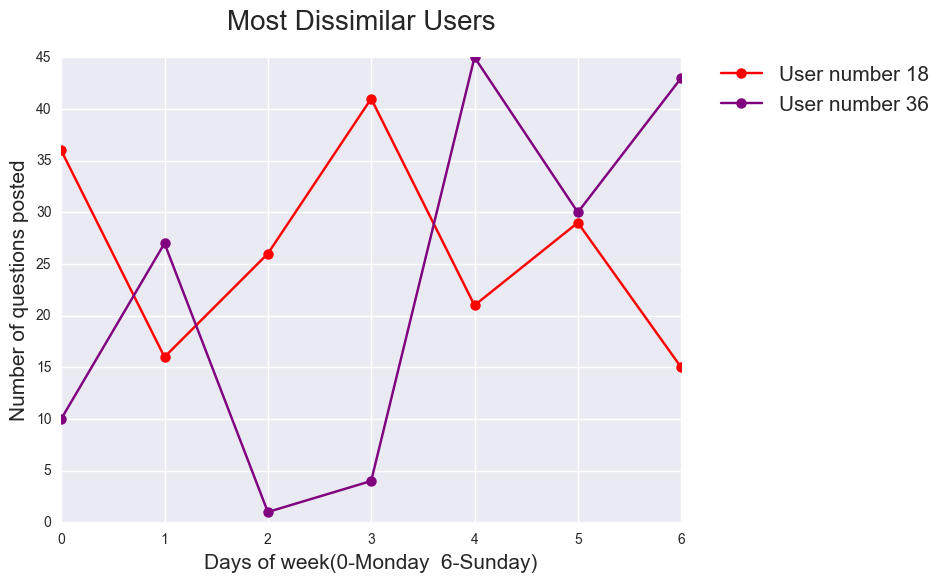

The two most similar users from top 100 users are: 73 and 85


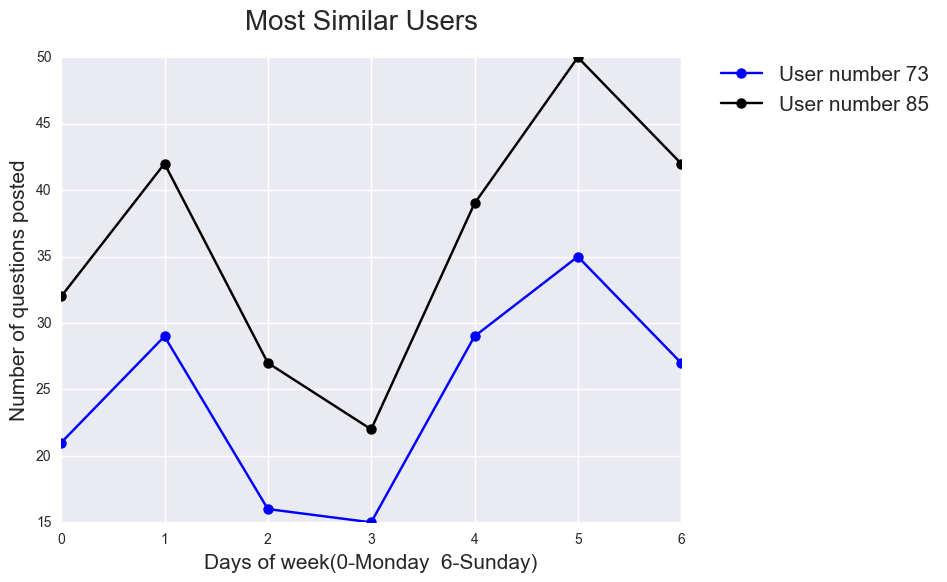

Similarity between all Users:


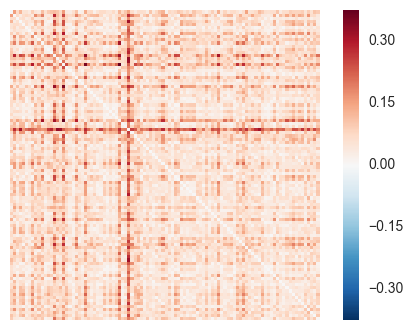

In [13]:
import pandas as pd
from pandas import Series, DataFrame
import xml.etree.ElementTree as ET
import csv
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer
import sklearn.metrics.pairwise as metrics
import numpy
import random
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unravel_index
from numpy import argmax
%matplotlib inline

def process(data):
    return " ".join([SnowballStemmer('english').stem(word) for word in data])


df = pd.read_csv('question_dataframe.csv')
df['Questions_posted'] = df.groupby('OwnerUserId')['OwnerUserId'].transform('count')
df1 = df.drop_duplicates('OwnerUserId')
df1 = df1.sort_values('Questions_posted', ascending = False)
top100 = df1['OwnerUserId'][0:100].tolist()
x = {}
#df_top100 = pd.DataFrame()
for i in top100:
    temp = df.loc[df['OwnerUserId']== i] #method 2
    temp['CreationDate'] = pd.to_datetime(temp['CreationDate'])
    temp['day_of_week'] = temp['CreationDate'].dt.weekday_name
    x.update({k: g['day_of_week'].tolist() for k,g in temp.groupby('OwnerUserId')})

y = x.values()
vec = CountVectorizer(preprocessor=process).fit(y)
final = vec.transform(y)
vector = final.toarray()


cosine_dists = metrics.cosine_distances(vector) # Measure Cosine distance

i,j = unravel_index(argmax(cosine_dists),cosine_dists.shape)
mini = 10
for c in range(100):
    for m in range(100):
        if cosine_dists[c][m] < mini:
            if c != m:
                mini = cosine_dists[c][m]
                ind_i = c
                ind_j = m

print('The two most dissimilar users from top 100 users are: {} and {} '.format(i+1,j+1))
T = range(vector.shape[1])
plt.figure(1,figsize=(8, 6), dpi=500)
plt.plot(T,vector[i],color = 'red', marker='.', markersize=15, label='User number {}'.format(i+1))
plt.plot(T,vector[j], color = 'purple',marker='.', markersize=15, label='User number {}'.format(j+1))
plt.suptitle('Most Dissimilar Users', fontsize=20)
plt.xlabel('Days of week(0-Monday  6-Sunday)', fontsize=15)
plt.ylabel('Number of questions posted', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15)
plt.show()

print('The two most similar users from top 100 users are: {} and {}'.format(ind_i+1,ind_j+1))
plt.figure(2,figsize=(8, 6), dpi=500)
plt.plot(T,vector[ind_i], color = 'blue', marker='.', markersize=15, label='User number {}'.format(ind_i+1))
plt.plot(T,vector[ind_j], color = 'black', marker='.', markersize=15, label='User number {}'.format(ind_j+1))
plt.suptitle('Most Similar Users', fontsize=20)
plt.xlabel('Days of week(0-Monday  6-Sunday)', fontsize=15)
plt.ylabel('Number of questions posted', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15)
plt.show()


print('Similarity between all Users:')
_ =sns.heatmap(cosine_dists, xticklabels=False, yticklabels=False, linewidths=0, 
            square=True,cbar="YlGnBu")

Used a different distance/similarity metric and repeated the same time series analysis. Comparison the two different metrics you used. 

The two most dissimilar users from top 100 users are: 18 and 36 


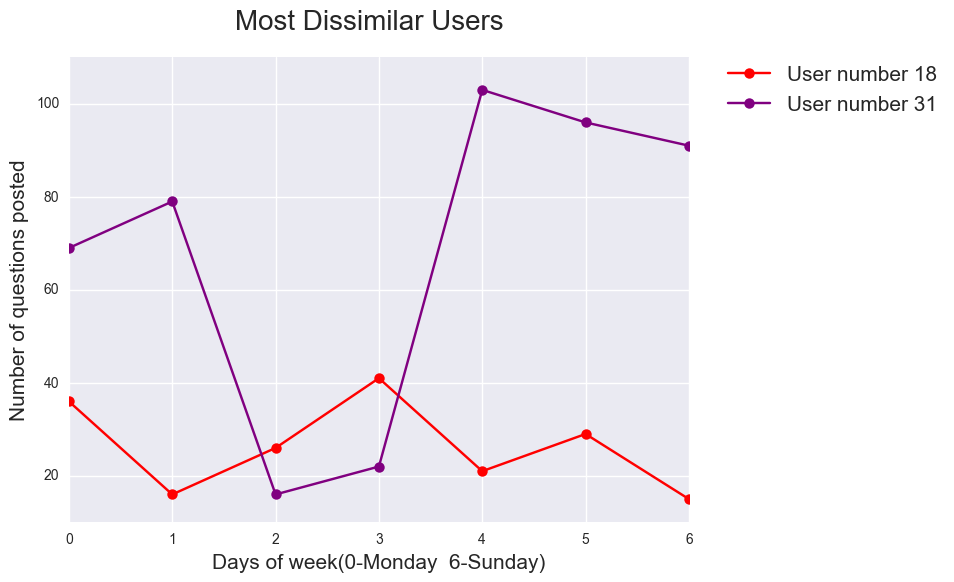

The two most similar users from top 100 users are :73 and 85


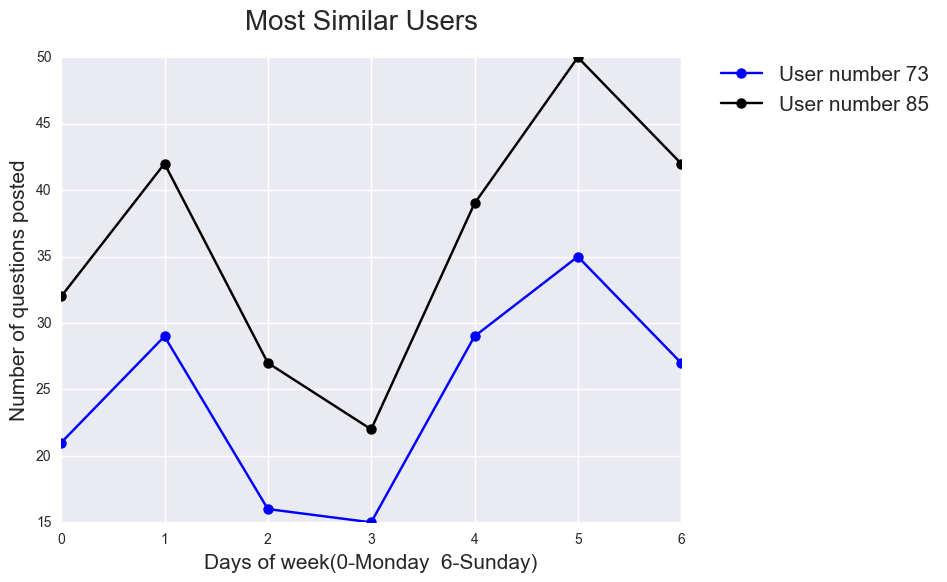

In [15]:
#Euclidean Distance

euclidean_dists = metrics.euclidean_distances(vector)

c1,c2 = unravel_index(argmax(euclidean_dists),euclidean_dists.shape)


mini = 10
for p in range(100):
    for n in range(100):
        if cosine_dists[p][n] < mini:
            if p != n:
                mini = cosine_dists[p][n]
                ind_p = p
                ind_n = n
                
print('The two most dissimilar users from top 100 users are: {} and {} '.format(i+1,j+1))
T = range(vector.shape[1])
plt.figure(3,figsize=(8, 6), dpi=500)
plt.plot(T,vector[c1],color = 'red', marker='.', markersize=15, label='User number {}'.format(c1+1))
plt.plot(T,vector[c2], color = 'purple',marker='.', markersize=15, label='User number {}'.format(c2+1))
plt.suptitle('Most Dissimilar Users', fontsize=20)
plt.xlabel('Days of week(0-Monday  6-Sunday)', fontsize=15)
plt.ylabel('Number of questions posted', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15)
plt.show()

print('The two most similar users from top 100 users are :{} and {}'.format(ind_i+1,ind_j+1))
plt.figure(4,figsize=(8, 6), dpi=500)
plt.plot(T,vector[ind_p], color = 'blue', marker='.', markersize=15, label='User number {}'.format(ind_p+1))
plt.plot(T,vector[ind_n], color = 'black', marker='.', markersize=15, label='User number {}'.format(ind_n+1))
plt.suptitle('Most Similar Users', fontsize=20)
plt.xlabel('Days of week(0-Monday  6-Sunday)', fontsize=15)
plt.ylabel('Number of questions posted', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=15)
plt.show()

Comparison:

The Cosine Distance measures the similarity of vectors with respect to the origin, while Euclidean Distance measures the distance between two points in the vector. In n-dimensional space, for a sphere the points are more closer to the surface of the sphere rather than the origin. Hence, euclidean distance does not consider the direction of the point i.e distance from the origin but only the magnitude i.e distance between two points, so can be errenous in calculating the distance between points. However, Cosine distance takes both direction and magnitude of a vector into consideration for calculating the distance measure and hence is more accurate when the data is n-dimensional as in the case at hand.